## Learn From Data Assignment 3
**Author:** Sonwabile Diko (217050276)<br>
**Date:** 14 April 2023<br>
**Source:** [META | Stock Market Analysis | Founding Years](https://www.kaggle.com/datasets/whenamancodes/meta-stock-market-analysis-founding-years)<br>
**GitHub:** [Jupyter-Notebook GitHub](https://github.com/SKDiko/Jupyter-Notebook/blob/352648ec0f92357cd8150bd6617de14c509cdbc5/mata_dataset.ipynb)<br>

### 1. Original Dataset

**1.1 Import libraries**

In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

**1.2 Read CSV dataset file**

In [2]:
original_df = pd.read_csv('C:\\Users\\Administrator\\Documents\\pandas_projects\\mata_dataset\\mata_dataset.csv')

**1.3 View original data frame**

In [3]:
original_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-09-20,359.299988,361.029999,349.799988,355.700012,355.700012,19822800
1,2021-09-21,358.500000,360.040009,355.190002,357.480011,357.480011,11751900
2,2021-09-22,347.230011,349.839996,340.690002,343.209991,343.209991,43692900
3,2021-09-23,345.359985,349.670013,343.000000,345.959991,345.959991,21806300
4,2021-09-24,343.239990,354.350006,342.369995,352.959991,352.959991,18801900
...,...,...,...,...,...,...,...
247,2022-09-13,161.539993,161.630005,152.669998,153.130005,153.130005,44444100
248,2022-09-14,153.330002,153.539993,149.050003,151.470001,151.470001,43064200
249,2022-09-15,149.800003,154.199997,148.699997,149.550003,149.550003,34606300
250,2022-09-16,148.050003,148.580002,144.289993,146.289993,146.289993,40018700


### 2. Cleaned Dataset

**2.1 Create copy of original data frame**

In [4]:
cleaned_df = original_df.copy()

**2.2 Check for missing values**

In [5]:
cleaned_df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

**2.3 Check for Duplicate rows**

In [6]:
duplicate_rows = cleaned_df[cleaned_df.duplicated()]

duplicate_rows

,Date,Open,High,Low,Close,Adj Close,Volume


**2.4 Check if columns have correct data types**

In [7]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


**2.5 Convert all cells in the Date column into dates**

In [8]:
cleaned_df['Date'] = pd.to_datetime(cleaned_df['Date'])

**2.6 View cleaned data frame**

In [9]:
print(cleaned_df.to_string())

          Date        Open        High         Low       Close   Adj Close     Volume
0   2021-09-20  359.299988  361.029999  349.799988  355.700012  355.700012   19822800
1   2021-09-21  358.500000  360.040009  355.190002  357.480011  357.480011   11751900
2   2021-09-22  347.230011  349.839996  340.690002  343.209991  343.209991   43692900
3   2021-09-23  345.359985  349.670013  343.000000  345.959991  345.959991   21806300
4   2021-09-24  343.239990  354.350006  342.369995  352.959991  352.959991   18801900
5   2021-09-27  349.809998  355.149994  347.079987  353.579987  353.579987   15205800
6   2021-09-28  347.970001  349.600006  338.920013  340.649994  340.649994   21710300
7   2021-09-29  343.149994  345.230011  338.880005  339.609985  339.609985   14452200
8   2021-09-30  340.450012  342.799988  338.149994  339.390015  339.390015   16547100
9   2021-10-01  341.609985  345.019989  338.640015  343.010010  343.010010   14905300
10  2021-10-04  335.529999  335.940002  322.700012  32

### 3. Descriptive Statistics

#### 3.1 Measures of Location

**3.1.1 Mean**

In [10]:
cleaned_df.mean(axis=0, skipna=True, numeric_only=False)

Date         2022-03-19 12:28:34.285714176
Open                            242.114246
High                            246.165794
Low                             238.031707
Close                           241.863691
Adj Close                       241.863691
Volume                     29596511.507937
dtype: object

**3.1.2 Median**

In [11]:
cleaned_df.median(axis=0, skipna=True, numeric_only=False)

Date         2022-03-19 12:00:00
Open                  211.595001
High                  216.705002
Low                   207.860001
Close                 211.760002
Adj Close             211.760002
Volume                25710350.0
dtype: object

**3.1.3 Mode**

In [12]:
print(cleaned_df.mode(axis=0, numeric_only=False, dropna=True).to_string())

          Date        Open        High         Low       Close   Adj Close     Volume
0   2021-09-20  167.070007  148.580002  159.610001  325.450012  325.450012   10593300
1   2021-09-21  332.489990  164.979996         NaN         NaN         NaN   10747000
2   2021-09-22         NaN  169.539993         NaN         NaN         NaN   11751900
3   2021-09-23         NaN  183.100006         NaN         NaN         NaN   12376600
4   2021-09-24         NaN  216.800003         NaN         NaN         NaN   12870500
5   2021-09-27         NaN  342.459991         NaN         NaN         NaN   13566200
6   2021-09-28         NaN         NaN         NaN         NaN         NaN   13602800
7   2021-09-29         NaN         NaN         NaN         NaN         NaN   13639500
8   2021-09-30         NaN         NaN         NaN         NaN         NaN   13987700
9   2021-10-01         NaN         NaN         NaN         NaN         NaN   14104900
10  2021-10-04         NaN         NaN         NaN    

**3.1.4 Geometric Mean**

In [13]:
geometric_mean = stats.gmean(cleaned_df['Adj Close'])
print ('Geometric Mean for Adj Close is: ' + str(geometric_mean))

Geometric Mean for Adj Close is: 231.51315626979027


**3.1.5 Weighted Mean**

In [14]:
value = cleaned_df['High']
weight = cleaned_df['Low']
weighted_mean = (value * weight).sum() / weight.sum()
print ('The weighted mean between highest & lowest recorded price is: ' + str(weighted_mean))

The weighted mean between highest & lowest recorded price is: 267.87965853307827


**3.1.6 Percentile**

In [15]:
print("80% Percentile")
cleaned_df.quantile(q=0.8, axis=0, numeric_only=False, interpolation='linear', method='single')

80% Percentile


Date         2022-07-07 19:12:00
Open                  330.268006
High                  335.686011
Low                   326.128003
Close                 331.407996
Adj Close             331.407996
Volume                37603700.0
Name: 0.8, dtype: object

**3.1.7 Quartiles**

**3.1.7.1 First Quartile**

In [16]:
cleaned_df.quantile(q=0.25, axis=0, numeric_only=False, interpolation='linear', method='single')

Date         2021-12-16 18:00:00
Open                  177.307502
High                  181.155006
Low                   174.807502
Close                 177.062503
Adj Close             177.062503
Volume                19759075.0
Name: 0.25, dtype: object

**3.1.7.2 Second Quartile**

In [17]:
cleaned_df.quantile(q=0.5, axis=0, numeric_only=False, interpolation='linear', method='single')

Date         2022-03-19 12:00:00
Open                  211.595001
High                  216.705002
Low                   207.860001
Close                 211.760002
Adj Close             211.760002
Volume                25710350.0
Name: 0.5, dtype: object

**3.1.7.3 Third Quartile**

In [18]:
cleaned_df.quantile(q=0.75, axis=0, numeric_only=False, interpolation='linear', method='single')

Date         2022-06-18 00:00:00
Open                  327.877502
High                  332.527496
Low                   323.102508
Close                 327.665009
Adj Close             327.665009
Volume                34490950.0
Name: 0.75, dtype: object

#### 3.2 Measures of Variability

**3.2.1 Range**

In [19]:
max = cleaned_df['Adj Close'].max(axis=0, skipna=True, numeric_only=False)
min = cleaned_df['Adj Close'].min(axis=0, skipna=True, numeric_only=False)
range = max - min
print("Adj Close Range is: " + str(range))

Adj Close Range is: 211.19001799999998


**3.2.2 Interquartile Range**

In [20]:
Q1 = cleaned_df['Adj Close'].quantile(q=0.25)
Q3 = cleaned_df['Adj Close'].quantile(q=0.75)
IQR = Q3 - Q1
print("Adj Close Interquartile Range is: " + str(IQR))

Adj Close Interquartile Range is: 150.60250524999998


**3.2.3 Variance**

In [21]:
variance = cleaned_df['Adj Close'].var(axis=0, skipna=True, ddof=1, numeric_only=False)
print("Adj Close Variance is: " + str(variance))

Adj Close Variance is: 5193.49464541907


**3.2.4 Standard Deviation**

In [22]:
cleaned_df.std(axis=0, skipna=True, ddof=1, numeric_only=False)

Date         106 days 01:56:07.706333722
Open                           72.143936
High                           72.519734
Low                            71.634867
Close                          72.065905
Adj Close                      72.065905
Volume                   17377552.393195
dtype: object

**3.2.5 Coefficient of Variation**

In [23]:
mean = cleaned_df['Adj Close'].mean(axis=0, skipna=True, numeric_only=False)
standard_deviation = cleaned_df['Adj Close'].std(axis=0, skipna=True, ddof=1, numeric_only=False)
coefficient_variation = (mean / standard_deviation) * 100
print("Adj Close Coefficient of Variation: " + str(coefficient_variation))

Adj Close Coefficient of Variation: 335.6145898063891


#### 3.3 Measures of Association

**3.3.1 Covariance**

In [24]:
cleaned_df.cov(min_periods=None, ddof=1, numeric_only=False)

,Date,Open,High,Low,Close,Adj Close,Volume
Date,8.400397e+31,-6.132483e+17,-6.169193e+17,-6.077938e+17,-6.117759e+17,-6.117759e+17,1.452656e+22
Open,-6.132483e+17,5.204748e+03,5.226577e+03,5.161686e+03,5.184140e+03,5.184140e+03,-2.988902e+08
High,-6.169193e+17,5.226577e+03,5.259112e+03,5.189180e+03,5.219788e+03,5.219788e+03,-2.925251e+08
Low,-6.077938e+17,5.161686e+03,5.189180e+03,5.131554e+03,5.156510e+03,5.156510e+03,-3.146314e+08
Close,-6.117759e+17,5.184140e+03,5.219788e+03,5.156510e+03,5.193495e+03,5.193495e+03,-3.048246e+08
Adj Close,-6.117759e+17,5.184140e+03,5.219788e+03,5.156510e+03,5.193495e+03,5.193495e+03,-3.048246e+08
Volume,1.452656e+22,-2.988902e+08,-2.925251e+08,-3.146314e+08,-3.048246e+08,-3.048246e+08,3.019793e+14


**3.3.2 Correlation Coefficient**

In [25]:
cleaned_df.corr(method='pearson', min_periods=1, numeric_only=False)

,Date,Open,High,Low,Close,Adj Close,Volume
Date,1.000000,-0.927442,-0.928159,-0.925725,-0.926217,-0.926217,0.091206
Open,-0.927442,1.000000,0.998990,0.998774,0.997119,0.997119,-0.238409
High,-0.928159,0.998990,1.000000,0.998891,0.998773,0.998773,-0.232123
Low,-0.925725,0.998774,0.998891,1.000000,0.998853,0.998853,-0.252749
Close,-0.926217,0.997119,0.998773,0.998853,1.000000,1.000000,-0.243406
Adj Close,-0.926217,0.997119,0.998773,0.998853,1.000000,1.000000,-0.243406
Volume,0.091206,-0.238409,-0.232123,-0.252749,-0.243406,-0.243406,1.000000


#### 3.4 Distribution Shape

**3.41 Skewness**

In [26]:
cleaned_df.skew(axis=0, skipna=True, numeric_only=True)

Open         0.348322
High         0.338423
Low          0.359277
Close        0.348055
Adj Close    0.348055
Volume       4.186848
dtype: float64

#### 3.5 Five-Number Summary

**3.5.1 Smallest Value**

In [27]:
cleaned_df.min(axis=0, skipna=True, numeric_only=False)

Date         2021-09-20 00:00:00
Open                  145.240005
High                  148.580002
Low                   144.289993
Close                 146.289993
Adj Close             146.289993
Volume                  10593300
dtype: object

**3.5.2 First Quartile**

In [28]:
cleaned_df.quantile(q=0.25, axis=0, numeric_only=False, interpolation='linear', method='single')

Date         2021-12-16 18:00:00
Open                  177.307502
High                  181.155006
Low                   174.807502
Close                 177.062503
Adj Close             177.062503
Volume                19759075.0
Name: 0.25, dtype: object

**3.5.3 Median**

In [29]:
cleaned_df.median(axis=0, skipna=True, numeric_only=False)

Date         2022-03-19 12:00:00
Open                  211.595001
High                  216.705002
Low                   207.860001
Close                 211.760002
Adj Close             211.760002
Volume                25710350.0
dtype: object

**3.5.4 Third Quartile**

In [30]:
cleaned_df.quantile(q=0.75, axis=0, numeric_only=False, interpolation='linear', method='single')

Date         2022-06-18 00:00:00
Open                  327.877502
High                  332.527496
Low                   323.102508
Close                 327.665009
Adj Close             327.665009
Volume                34490950.0
Name: 0.75, dtype: object

**3.5.5 Largest Value**

In [31]:
cleaned_df.max(axis=0, skipna=True, numeric_only=False)

Date         2022-09-19 00:00:00
Open                  359.299988
High                  361.029999
Low                   355.190002
Close                 357.480011
Adj Close             357.480011
Volume                 188119900
dtype: object

#### 3.6 Chebyshev’s Theorem

**3.6.1 Standard Deviations (Z = 2)**

In [32]:
mean = cleaned_df['Adj Close'].mean(axis=0, skipna=True, numeric_only=False)
standard_deviation = cleaned_df['Adj Close'].std(axis=0, skipna=True, ddof=1, numeric_only=False)

lower = (mean - standard_deviation) * 2
upper = (mean + standard_deviation) * 2

print("At least 75% of the Adj Close values lie between "+ str(lower) +" and "+ str(upper) +" of the Standard Deviations (+/-2).")

At least 75% of the Adj Close values lie between 339.5955723218931 and 627.859191820964 of the Standard Deviations (+/-2).


**3.6.2 Standard Deviations (Z = 3)**

In [33]:
mean = cleaned_df['Adj Close'].mean(axis=0, skipna=True, numeric_only=False)
standard_deviation = cleaned_df['Adj Close'].std(axis=0, skipna=True, ddof=1, numeric_only=False)

lower = (mean - standard_deviation) * 3
upper = (mean + standard_deviation) * 3

print("At least 89% of the Adj Close values lie between "+ str(lower) +" and "+ str(upper) +" of the Standard Deviations (+/-3).")

At least 89% of the Adj Close values lie between 509.39335848283963 and 941.7887877314461 of the Standard Deviations (+/-3).


**3.6.3 Standard Deviations (Z = 4)**

In [34]:
mean = cleaned_df['Adj Close'].mean(axis=0, skipna=True, numeric_only=False)
standard_deviation = cleaned_df['Adj Close'].std(axis=0, skipna=True, ddof=1, numeric_only=False)

lower = (mean - standard_deviation) * 4
upper = (mean + standard_deviation) * 4

print("At least 94% of the Adj Close values lie between "+ str(lower) +" and "+ str(upper) +" of the Standard Deviations (+/-4).")

At least 94% of the Adj Close values lie between 679.1911446437862 and 1255.718383641928 of the Standard Deviations (+/-4).


#### 3.7 Empirical Rule

**3.7.1 68.26% of values**

In [35]:
mean = cleaned_df['Adj Close'].mean(axis=0, skipna=True, numeric_only=False)
standard_deviation = cleaned_df['Adj Close'].std(axis=0, skipna=True, ddof=1, numeric_only=False)

lower = mean - standard_deviation
upper = mean + standard_deviation

print("Approximately 68,26% of the Adj Close values lie between "+ str(lower) +" and " + str(upper))

Approximately 68,26% of the Adj Close values lie between 169.79778616094654 and 313.929595910482


**3.7.2 95.44% of values**

In [36]:
mean = cleaned_df['Adj Close'].mean(axis=0, skipna=True, numeric_only=False)
standard_deviation = cleaned_df['Adj Close'].std(axis=0, skipna=True, ddof=1, numeric_only=False)

lower = (mean - standard_deviation) * 2
upper = (mean + standard_deviation) * 2

print("Approximately 95.44% of the Adj Close values lie between "+ str(lower) +" and " + str(upper))

Approximately 95.44% of the Adj Close values lie between 339.5955723218931 and 627.859191820964


**3.7.3 99.72% of values**

In [37]:
mean = cleaned_df['Adj Close'].mean(axis=0, skipna=True, numeric_only=False)
standard_deviation = cleaned_df['Adj Close'].std(axis=0, skipna=True, ddof=1, numeric_only=False)

lower = (mean - standard_deviation) * 3
upper = (mean + standard_deviation) * 3

print("Approximately 99.72% of the Adj Close values lie between "+ str(lower) +" and " + str(upper))

Approximately 99.72% of the Adj Close values lie between 509.39335848283963 and 941.7887877314461


### 4. Statistics Not Covered in Class

**4.1 Descriptive statistics summary**

In [38]:
cleaned_df.describe()


,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,242.114246,246.165794,238.031707,241.863691,241.863691,2.959651e+07
std,72.143936,72.519734,71.634867,72.065905,72.065905,1.737755e+07
min,145.240005,148.580002,144.289993,146.289993,146.289993,1.059330e+07
25%,177.307502,181.155006,174.807502,177.062503,177.062503,1.975908e+07
50%,211.595001,216.705002,207.860001,211.760002,211.760002,2.571035e+07
75%,327.877502,332.527496,323.102508,327.665009,327.665009,3.449095e+07
max,359.299988,361.029999,355.190002,357.480011,357.480011,1.881199e+08


**4.2 Kurtosis**

In [39]:
cleaned_df.kurt(axis=0, skipna=True, numeric_only=True)

Open         -1.616894
High         -1.619695
Low          -1.611272
Close        -1.615349
Adj Close    -1.615349
Volume       29.494553
dtype: float64

**4.3 Mean standard error**

In [40]:
cleaned_df.sem(axis=1, skipna=True, ddof=1, numeric_only=True)

0      3.303741e+06
1      1.958590e+06
2      7.282093e+06
3      3.634326e+06
4      3.133592e+06
           ...     
247    7.407324e+06
248    7.177341e+06
249    5.767692e+06
250    6.669759e+06
251    3.690326e+06
Length: 252, dtype: float64

**4.4 Cumulative sum**

In [41]:
cleaned_df['Adj Close'].cumsum()

0        355.700012
1        713.180023
2       1056.390014
3       1402.350005
4       1755.309996
           ...     
247    60354.320140
248    60505.790141
249    60655.340144
250    60801.630137
251    60949.650141
Name: Adj Close, Length: 252, dtype: float64

**4.5 absolute value**

In [42]:
cleaned_df['Adj Close'].abs()

0      355.700012
1      357.480011
2      343.209991
3      345.959991
4      352.959991
          ...    
247    153.130005
248    151.470001
249    149.550003
250    146.289993
251    148.020004
Name: Adj Close, Length: 252, dtype: float64

### 5. Graphs

**5.1 Line Chart**

* Highest vs. Lowest recorded price for the day from 2021-09 to 2022-09

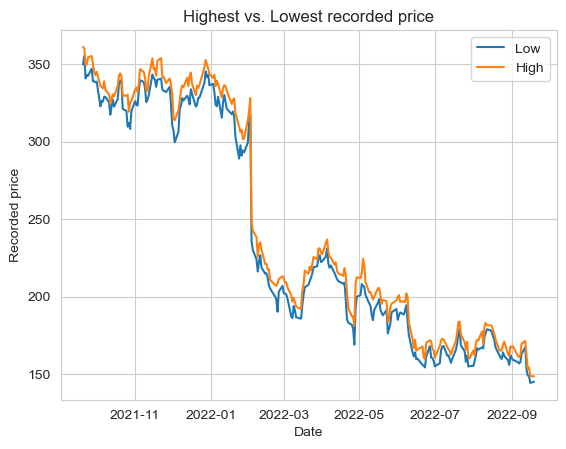

In [43]:
sns.set_style("whitegrid")

plt.plot(cleaned_df['Date'], cleaned_df['Low'])
plt.plot(cleaned_df['Date'], cleaned_df['High'])

plt.xlabel('Date')
plt.ylabel('Recorded price');

plt.title("Highest vs. Lowest recorded price")

plt.legend(['Low', 'High']);

**5.2 Scatter Plot**

* Adjusted closing price based on corporate actions from 2021-09 to 2022-09

Text(0.5, 1.0, 'Adjusted closing price over time')

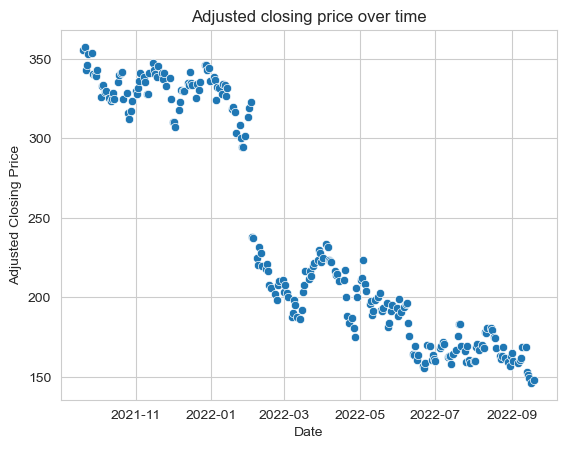

In [44]:
sns.scatterplot(x=cleaned_df['Date'], y=cleaned_df['Adj Close']);

plt.ylabel('Adjusted Closing Price');

plt.title("Adjusted closing price over time")

**5.3 Bar Chart**

* Adjusted closing price based on corporate actions from 2022-04 to 2022-09

Text(0.5, 1.0, 'Adjusted closing price from Apr to Sep 2022')

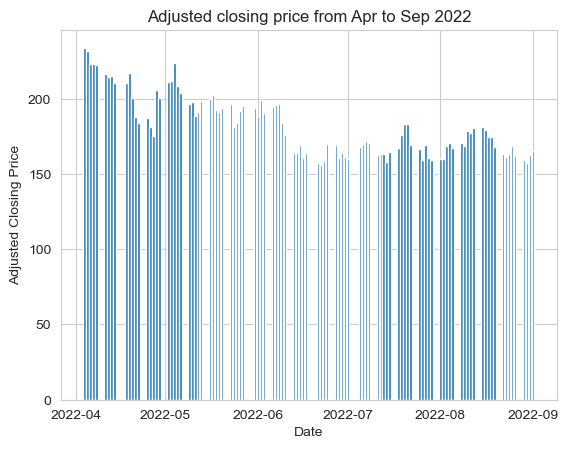

In [45]:
start_date = '2022-04'
end_date = '2022-09'
date_range = (cleaned_df['Date'] > start_date) & (cleaned_df['Date'] <= end_date)

plt.bar(cleaned_df['Date'].loc[date_range], cleaned_df['Adj Close'].loc[date_range]);

plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price');
plt.title("Adjusted closing price from Apr to Sep 2022")

**5.4 Histogram**

* Histogram of Adjusted closing price based on corporate actions

Text(0.5, 1.0, 'Adjusted closing price Histogram')

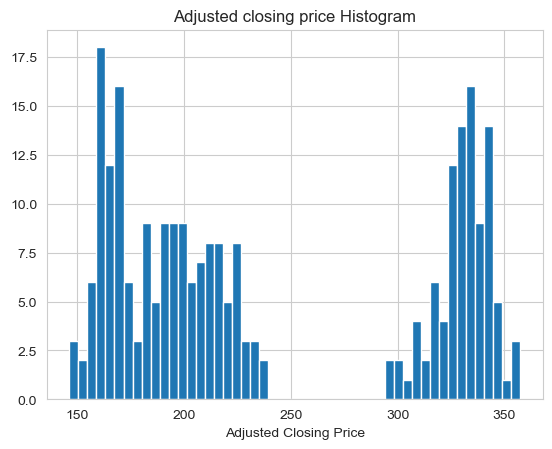

In [46]:
cleaned_df['Adj Close'].hist(bins=50)

plt.xlabel('Adjusted Closing Price');

plt.title("Adjusted closing price Histogram")

**5.6 Box Plot**

* Box Plot for: market open and close price, lowest and highest recorded price, and adjusted closing price

Text(0.5, 1.0, 'Box and Whiskers')

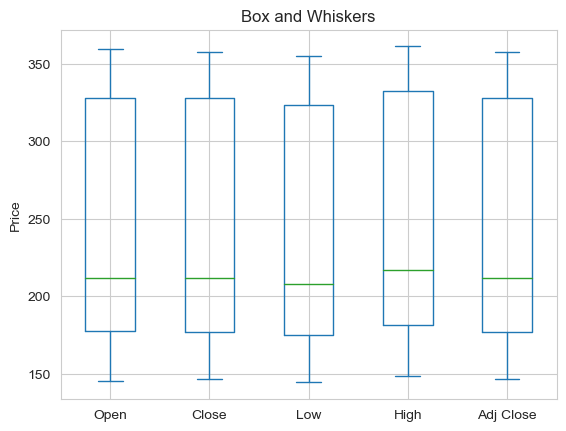

In [47]:
cleaned_df[['Open', 'Close', 'Low', 'High', 'Adj Close']].plot.box();

plt.ylabel('Price');

plt.title("Box and Whiskers")

**5.7 Area Plot**

* Area plot between highest and lowest recorded price

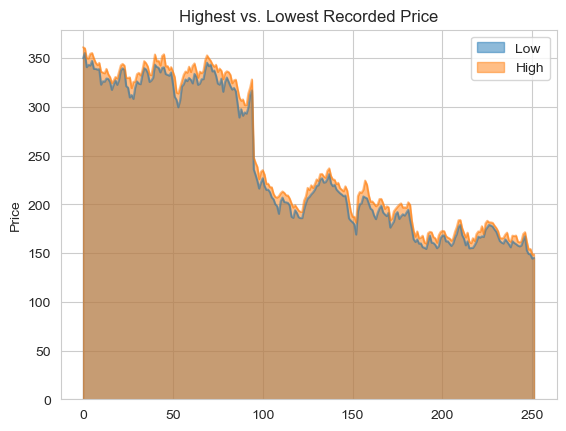

In [48]:
cleaned_df[['Low', 'High']].plot.area(stacked=False);

plt.title("Highest vs. Lowest Recorded Price")

plt.ylabel('Price');

**5.8 Heatmap**

* Correlation Heatmap between date, market open and close price, lowest and highest recorded price, adjusted closing price, and volume of stocks sold

Text(0.5, 1.0, 'Correlation Heatmap')

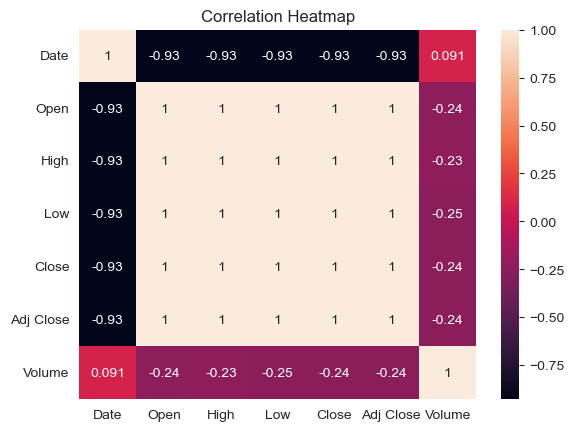

In [49]:
corr = cleaned_df.corr(method='pearson', min_periods=1, numeric_only=False)
sns.heatmap(corr, annot = True)

plt.title("Correlation Heatmap")

### 6. Learning Reflections

**6.1 Difference between Python and Excel:**
* Python is a general-purpose programming language, whereas Excel is a spreadsheet program. This means that Python can be used for a wide range of tasks beyond just data analysis, while Excel is primarily designed for working with tabular data.
* Overall, Python is a more powerful and flexible tool for working with data and performing descriptive statistics, while Excel is better suited for simpler analyses and quick visualizations.

**6.2 When will you use Python or Excel:**
* I will use python when I need to do more complex statistical analyses on larger datasets.
* I will use Excel when I need to do basic descriptive statistics tasks and simple calculations or analysis.
* Overall, if I have a small dataset and need to perform basic descriptive statistics, Excel is a great choice. However, if I need to conduct more complex analyses or have a larger dataset, Python is likely the better option.

**6.3 If you could do this assignment over, what would you do differently:**
* **Use the appropriate Python libraries:** I noticed that python has many libraries that can help me perform statistical analysis, such as NumPy, Pandas, and Matplotlib.
* On this assignment I focused more on pandas, and if I would do this assignment again, I would also try to learn more about NumPy and Matplotlib, so that I can pick more suitable functions for performing statistical analysis.

**6.4 What are the gaps in your programming or stats knowledge:**
* **Limited support for data pre-processing:** Python's built-in statistical libraries such as NumPy and Pandas do not always handle dirty or missing data properly. This can make it difficult to perform some types of descriptive statistics if my data is not pre-processed properly.